<a href="https://colab.research.google.com/github/MathewLipman/Work-Samples/blob/main/Missing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style




https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95

In [2]:
mvc = pd.read_csv('/content/drive/MyDrive/Dataset/nypd_mvc_2018.csv')

In [3]:
data = np.random.choice([1.0, np.nan],
                        size=(3, 3),
                        p=[.3, .7])
df = pd.DataFrame(data, columns=['A','B','C'])
print(df)

    A    B    C
0 NaN  NaN  NaN
1 NaN  1.0  NaN
2 NaN  1.0  1.0


In [4]:
print(df.isnull())

      A      B      C
0  True   True   True
1  True  False   True
2  True  False  False


In [5]:
print(df.isnull().sum())

A    3
B    1
C    2
dtype: int64


In [6]:
null_counts = mvc.isnull().sum()

some columns are 98% null but they are sequential, vehicle 4 - if there was no vehicle 4 involved in the accident, it is null so this is not problematic.

In [7]:
null_count_pct = null_counts / mvc.shape[0] * 100

In [8]:
null_count_pct.sort_values(ascending=False)

vehicle_5              99.683741
cause_vehicle_5        99.666459
vehicle_4              98.779898
cause_vehicle_4        98.698673
vehicle_3              93.930596
cause_vehicle_3        93.553850
off_street             76.201092
cross_street           50.547836
borough                35.680216
on_street              24.127264
vehicle_2              21.191069
cause_vehicle_2        15.021430
location                6.714019
vehicle_1               0.613508
cause_vehicle_1         0.302433
total_killed            0.008641
total_injured           0.001728
unique_key              0.000000
motorist_killed         0.000000
date                    0.000000
pedestrians_killed      0.000000
motorist_injured        0.000000
cyclist_injured         0.000000
pedestrians_injured     0.000000
time                    0.000000
cyclist_killed          0.000000
dtype: float64

In [9]:
null_df = pd.DataFrame({'null_counts': null_counts, 'null_pct': null_count_pct})
# Rotate the dataframe so that rows become columns and vice-versa
null_df = null_df.T.astype(int)

print(null_df)

             unique_key  date  time  borough  location  on_street  \
null_counts           0     0     0    20646      3885      13961   
null_pct              0     0     0       35         6         24   

             cross_street  off_street  pedestrians_injured  cyclist_injured  \
null_counts         29249       44093                    0                0   
null_pct               50          76                    0                0   

             ...  vehicle_1  vehicle_2  vehicle_3  vehicle_4  vehicle_5  \
null_counts  ...        355      12262      54352      57158      57681   
null_pct     ...          0         21         93         98         99   

             cause_vehicle_1  cause_vehicle_2  cause_vehicle_3  \
null_counts              175             8692            54134   
null_pct                   0               15               93   

             cause_vehicle_4  cause_vehicle_5  
null_counts            57111            57671  
null_pct                  98     

In [10]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
print(null_df[killed_cols])

             pedestrians_killed  cyclist_killed  motorist_killed  total_killed
null_counts                   0               0                0             5
null_pct                      0               0                0             0


checks for columns in which the sum is supposed to equal the totl but does not. 

In [11]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
killed = mvc[killed_cols].copy()
killed_manual_sum = killed.iloc[:,:3].sum(axis=1)
killed_mask = killed_manual_sum != killed['total_killed']
killed_non_eq = killed[killed_mask]

In [12]:
import numpy as np

# fix the killed values
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'].isnull(), killed_manual_sum)
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)

# Create an injured dataframe and manually sum values
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured_manual_sum = injured.iloc[:,:3].sum(axis=1)
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'].isnull(), injured_manual_sum)
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'] != injured_manual_sum, np.nan)

In [13]:
mvc['total_injured'] = injured['total_injured']
mvc['total_killed'] = killed['total_killed']

`plot_null_matrix` function to chart a heatmap of null values in a dataframe. 

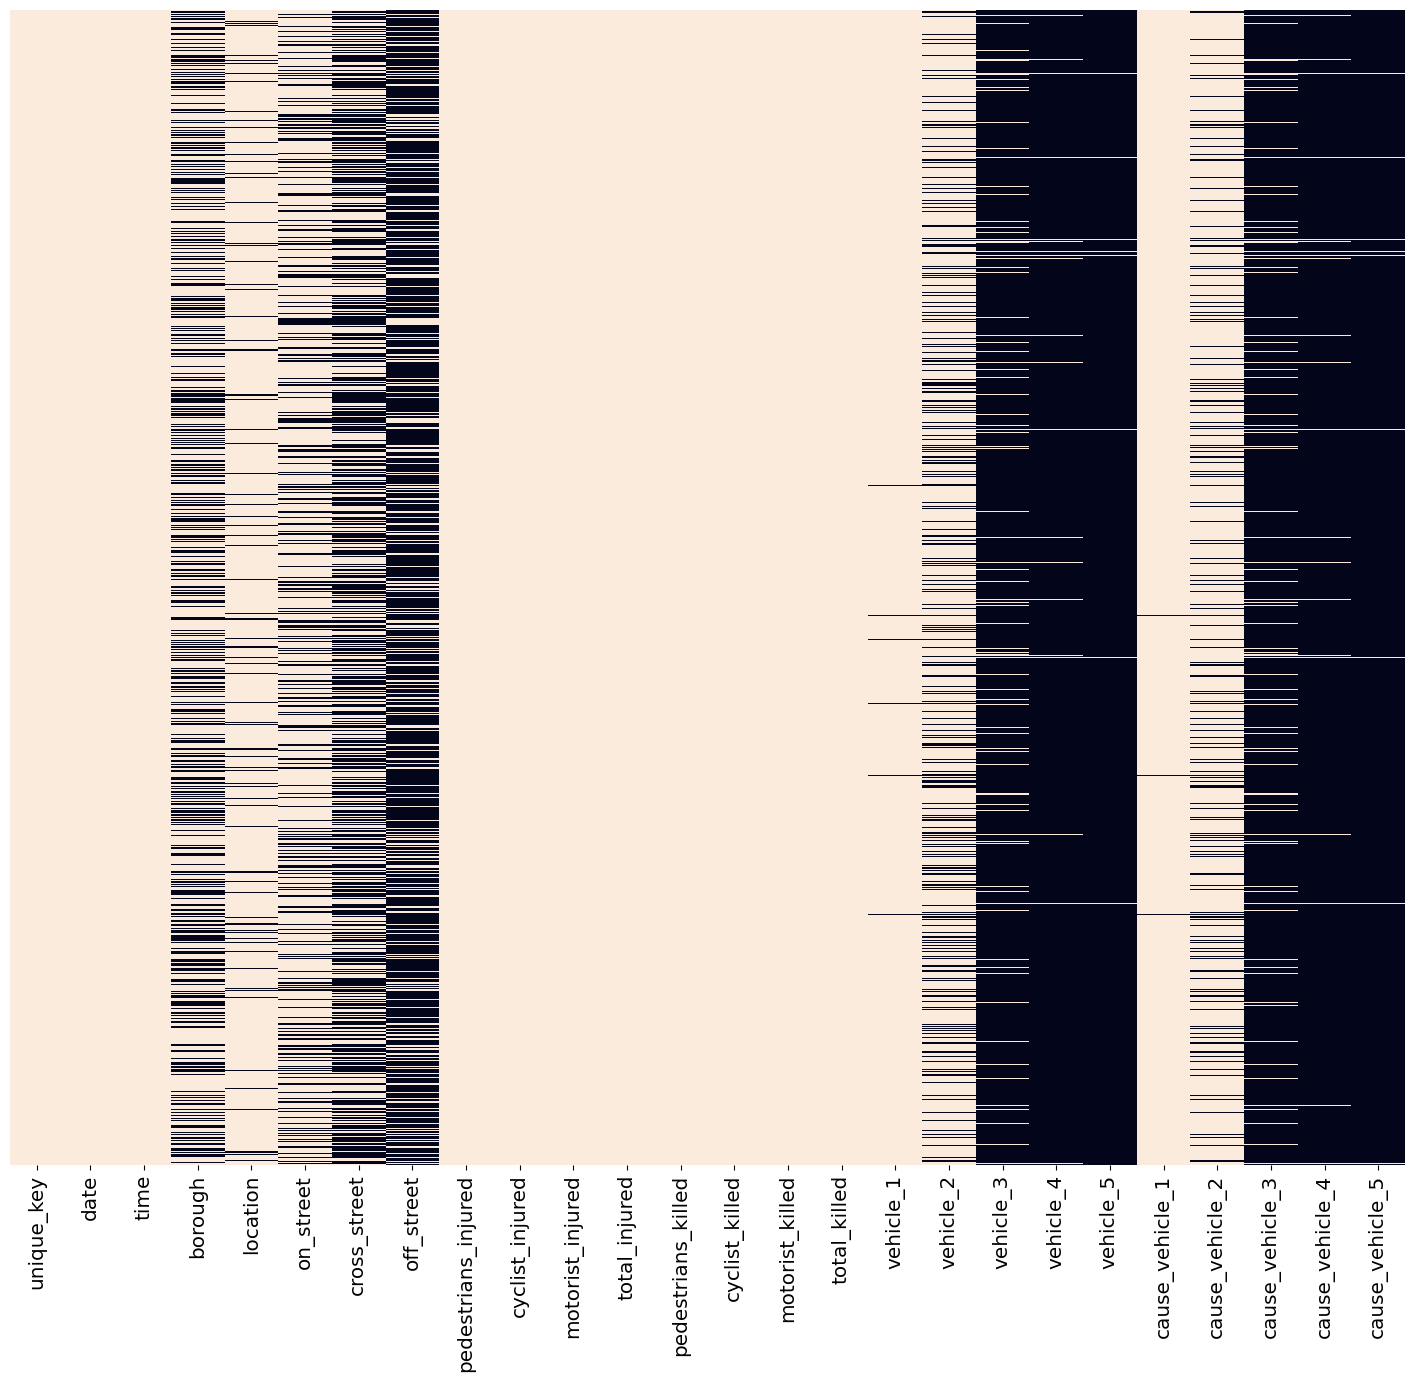

In [14]:
def plot_null_matrix(df, figsize=(18,15)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()

plot_null_matrix(mvc)    

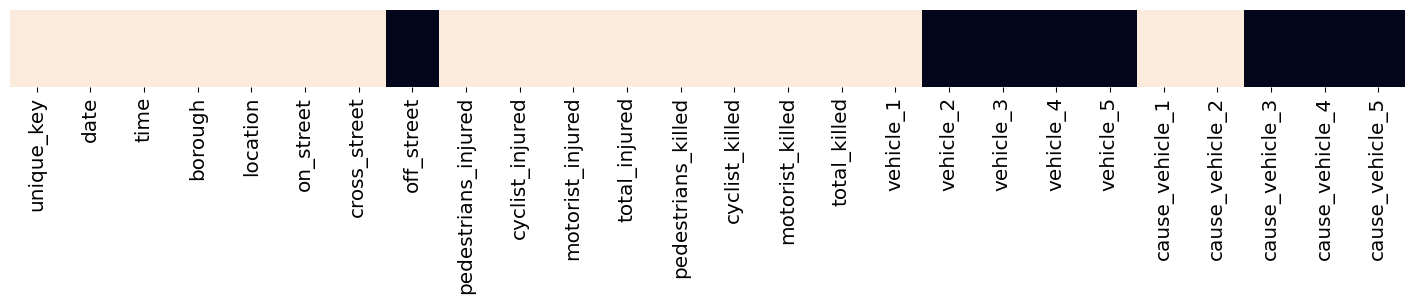

In [15]:
plot_null_matrix(mvc.head(1), figsize=(18,1))

In [16]:
print(mvc.head(1))

   unique_key        date   time    borough                location  \
0     3869058  2018-03-23  21:40  MANHATTAN  (40.742832, -74.00771)   

                          on_street cross_street off_street  \
0  WEST 15 STREET                      10 AVENUE        NaN   

   pedestrians_injured  cyclist_injured  ...          vehicle_1  vehicle_2  \
0                    0                0  ...  PASSENGER VEHICLE        NaN   

   vehicle_3  vehicle_4  vehicle_5        cause_vehicle_1 cause_vehicle_2  \
0        NaN        NaN        NaN  Following Too Closely     Unspecified   

  cause_vehicle_3 cause_vehicle_4 cause_vehicle_5  
0             NaN             NaN             NaN  

[1 rows x 26 columns]


In [17]:
cols_with_missing_vals = mvc.columns[mvc.isnull().sum() > 0]
missing_corr = mvc[cols_with_missing_vals].isnull().corr()
print(missing_corr)

                  borough  location  on_street  cross_street  off_street  \
borough          1.000000  0.190105  -0.350190      0.409107    0.362189   
location         0.190105  1.000000  -0.073975     -0.069719    0.084579   
on_street       -0.350190 -0.073975   1.000000      0.557767   -0.991030   
cross_street     0.409107 -0.069719   0.557767      1.000000   -0.552763   
off_street       0.362189  0.084579  -0.991030     -0.552763    1.000000   
total_injured   -0.002827 -0.001486   0.006220      0.002513   -0.004266   
total_killed     0.005582  0.015496  -0.002344      0.004112    0.002323   
vehicle_1       -0.018325 -0.010466  -0.001889     -0.017018    0.001812   
vehicle_2       -0.077516 -0.033842   0.119647      0.043799   -0.121129   
vehicle_3       -0.061932 -0.000927   0.020867     -0.049910   -0.022404   
vehicle_4       -0.020406  0.004655   0.004172     -0.021137   -0.004074   
vehicle_5       -0.010733 -0.005797  -0.002768     -0.012003    0.002492   
cause_vehicl

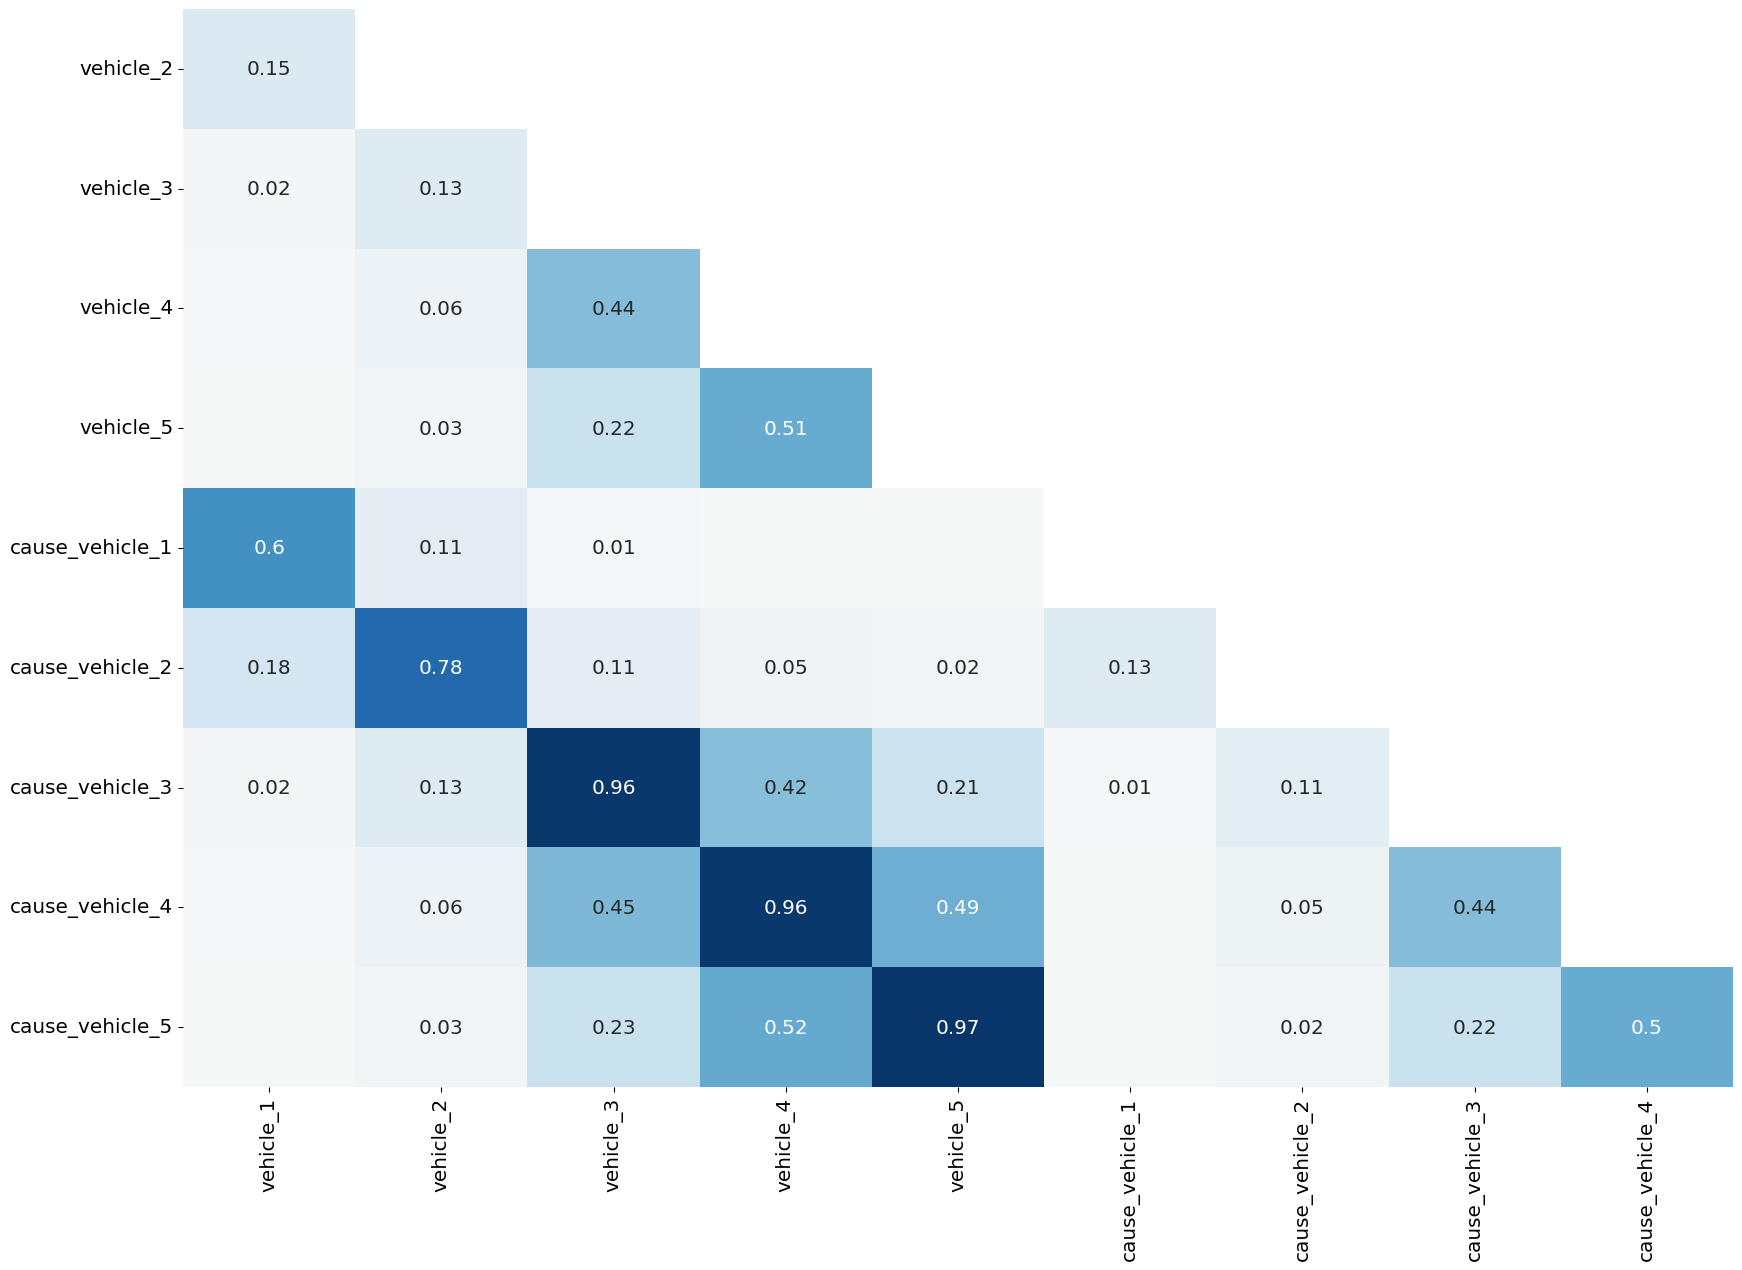

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()
veh_cols = [c for c in mvc.columns if 'vehicle' in c]
plot_null_correlations(mvc[veh_cols])

In [19]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']

vc_null_data = []

# for v in range(1,6):
#     v_col = 'vehicle_{}'.format(v)
#     c_col = 'cause_vehicle_{}'.format(v)
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    
    v_null = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
    c_null = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()
    
    vc_null_data.append([v, v_null, c_null])

vc_null_df = pd.DataFrame(vc_null_data, columns=col_labels)


In [20]:
v_cols = [c for c in mvc.columns if c.startswith("vehicle")]

In [21]:
print(vc_null_df)

   v_number  vehicle_missing  cause_missing
0         1              204             24
1         2             3793            223
2         3              242             24
3         4               50              3
4         5               10              0


By stacking our columns together we can do a value count and see the most common values across more than a single index at a time.

`Stacking `also omits NaNs (not a number)

In [22]:

cause_cols = [c for c in mvc.columns if "cause_" in c]
cause = mvc[cause_cols]
print(cause.head())

cause_1d = cause.stack()
print(cause_1d.head())


         cause_vehicle_1      cause_vehicle_2 cause_vehicle_3 cause_vehicle_4  \
0  Following Too Closely          Unspecified             NaN             NaN   
1       Backing Unsafely          Unspecified             NaN             NaN   
2  Following Too Closely          Unspecified             NaN             NaN   
3                  Glare  Passing Too Closely             NaN             NaN   
4     Turning Improperly          Unspecified             NaN             NaN   

  cause_vehicle_5  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
0  cause_vehicle_1    Following Too Closely
   cause_vehicle_2              Unspecified
1  cause_vehicle_1         Backing Unsafely
   cause_vehicle_2              Unspecified
2  cause_vehicle_1    Following Too Closely
dtype: object


In [28]:

cause_1d.value_counts(normalize=True).head(15)

Unspecified                       0.515354
Driver Inattention/Distraction    0.158243
Following Too Closely             0.058877
Failure to Yield Right-of-Way     0.040937
Passing or Lane Usage Improper    0.029228
Passing Too Closely               0.027300
Backing Unsafely                  0.026906
Other Vehicular                   0.022620
Unsafe Lane Changing              0.021266
Turning Improperly                0.014255
Reaction to Uninvolved Vehicle    0.010813
Traffic Control Disregarded       0.010804
Driver Inexperience               0.009737
Unsafe Speed                      0.008921
Pavement Slippery                 0.006769
dtype: float64

In [40]:

vehicle_cols = [v for v in mvc.columns if v.startswith('vehicle_')]
vehicle = mvc[vehicle_cols]
print(vehicle.head())

vehicle_1d = vehicle.stack()
print(vehicle_1d.head())

top10_vehicles = vehicle_1d.value_counts()
print(top10_vehicles.head(10))

                             vehicle_1 vehicle_2 vehicle_3 vehicle_4 vehicle_5
0                    PASSENGER VEHICLE       NaN       NaN       NaN       NaN
1        SPORT UTILITY / STATION WAGON        DS       NaN       NaN       NaN
2  Station Wagon/Sport Utility Vehicle     Sedan       NaN       NaN       NaN
3                                Sedan     Sedan       NaN       NaN       NaN
4  Station Wagon/Sport Utility Vehicle     Sedan       NaN       NaN       NaN
0  vehicle_1                      PASSENGER VEHICLE
1  vehicle_1          SPORT UTILITY / STATION WAGON
   vehicle_2                                     DS
2  vehicle_1    Station Wagon/Sport Utility Vehicle
   vehicle_2                                  Sedan
dtype: object
Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
Pick-up Truck              

In [35]:
top10 = vehicle_1d.value_counts(normalize=True).head(10)
print(top10)

Sedan                                  0.308180
Station Wagon/Sport Utility Vehicle    0.242987
PASSENGER VEHICLE                      0.149062
SPORT UTILITY / STATION WAGON          0.114927
Taxi                                   0.032387
Pick-up Truck                          0.022072
TAXI                                   0.017598
Box Truck                              0.015431
Bike                                   0.011069
Bus                                    0.010808
dtype: float64


In [43]:
def summarize_missing():
    v_missing_data = []

    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)

        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

summary_before = summarize_missing()
print(summary_before)

   vehicle_number  vehicle_missing  cause_missing
0               1              204             24
1               2             3793            223
2               3              242             24
3               4               50              3
4               5               10              0


In [44]:
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    
    v_missing_mask = mvc[v_col].isnull() & mvc[c_col].notnull()
    c_missing_mask = mvc[c_col].isnull() & mvc[v_col].notnull()
    mvc[v_col] = mvc[v_col].mask(v_missing_mask, "Unspecified")
    mvc[c_col] = mvc[c_col].mask(c_missing_mask, "Unspecified")

summary_after = summarize_missing()   

Anything with a null value now has an unspecified value

In [59]:
print(summary_after)

   vehicle_number  vehicle_missing  cause_missing
0               1                0              0
1               2                0              0
2               3                0              0
3               4                0              0
4               5                0              0


In [61]:
print(mvc[c_col].value_counts())

Unspecified                     184
Following Too Closely             4
Other Vehicular                   1
Tire Failure/Inadequate           1
Aggressive Driving/Road Rage      1
Obstruction/Debris                1
Driver Inexperience               1
Name: cause_vehicle_5, dtype: int64


In [62]:
print(mvc[v_col].value_counts())

Sedan                                  67
Station Wagon/Sport Utility Vehicle    48
PASSENGER VEHICLE                      27
SPORT UTILITY / STATION WAGON          24
Unspecified                            10
Pick-up Truck                           6
Taxi                                    4
TK                                      2
BU                                      1
van                                     1
Motorcycle                              1
TAXI                                    1
Bike                                    1
Name: vehicle_5, dtype: int64


In [63]:
loc_cols = ['borough', 'location', 'on_street', 'off_street', 'cross_street']
location_data = mvc[loc_cols]
print(location_data.head())

     borough                location                         on_street  \
0  MANHATTAN  (40.742832, -74.00771)  WEST 15 STREET                     
1   BROOKLYN  (40.623714, -73.99314)  16 AVENUE                          
2        NaN   (40.591755, -73.9083)  BELT PARKWAY                       
3     QUEENS   (40.73602, -73.87954)  GRAND AVENUE                       
4      BRONX  (40.884727, -73.89945)                               NaN   

                                 off_street    cross_street  
0                                       NaN       10 AVENUE  
1                                       NaN       62 STREET  
2                                       NaN             NaN  
3                                       NaN  VANLOON STREET  
4  208       WEST 238 STREET                            NaN  


In [64]:
print(location_data.isnull().sum())

borough         20646
location         3885
on_street       13961
off_street      44093
cross_street    29249
dtype: int64


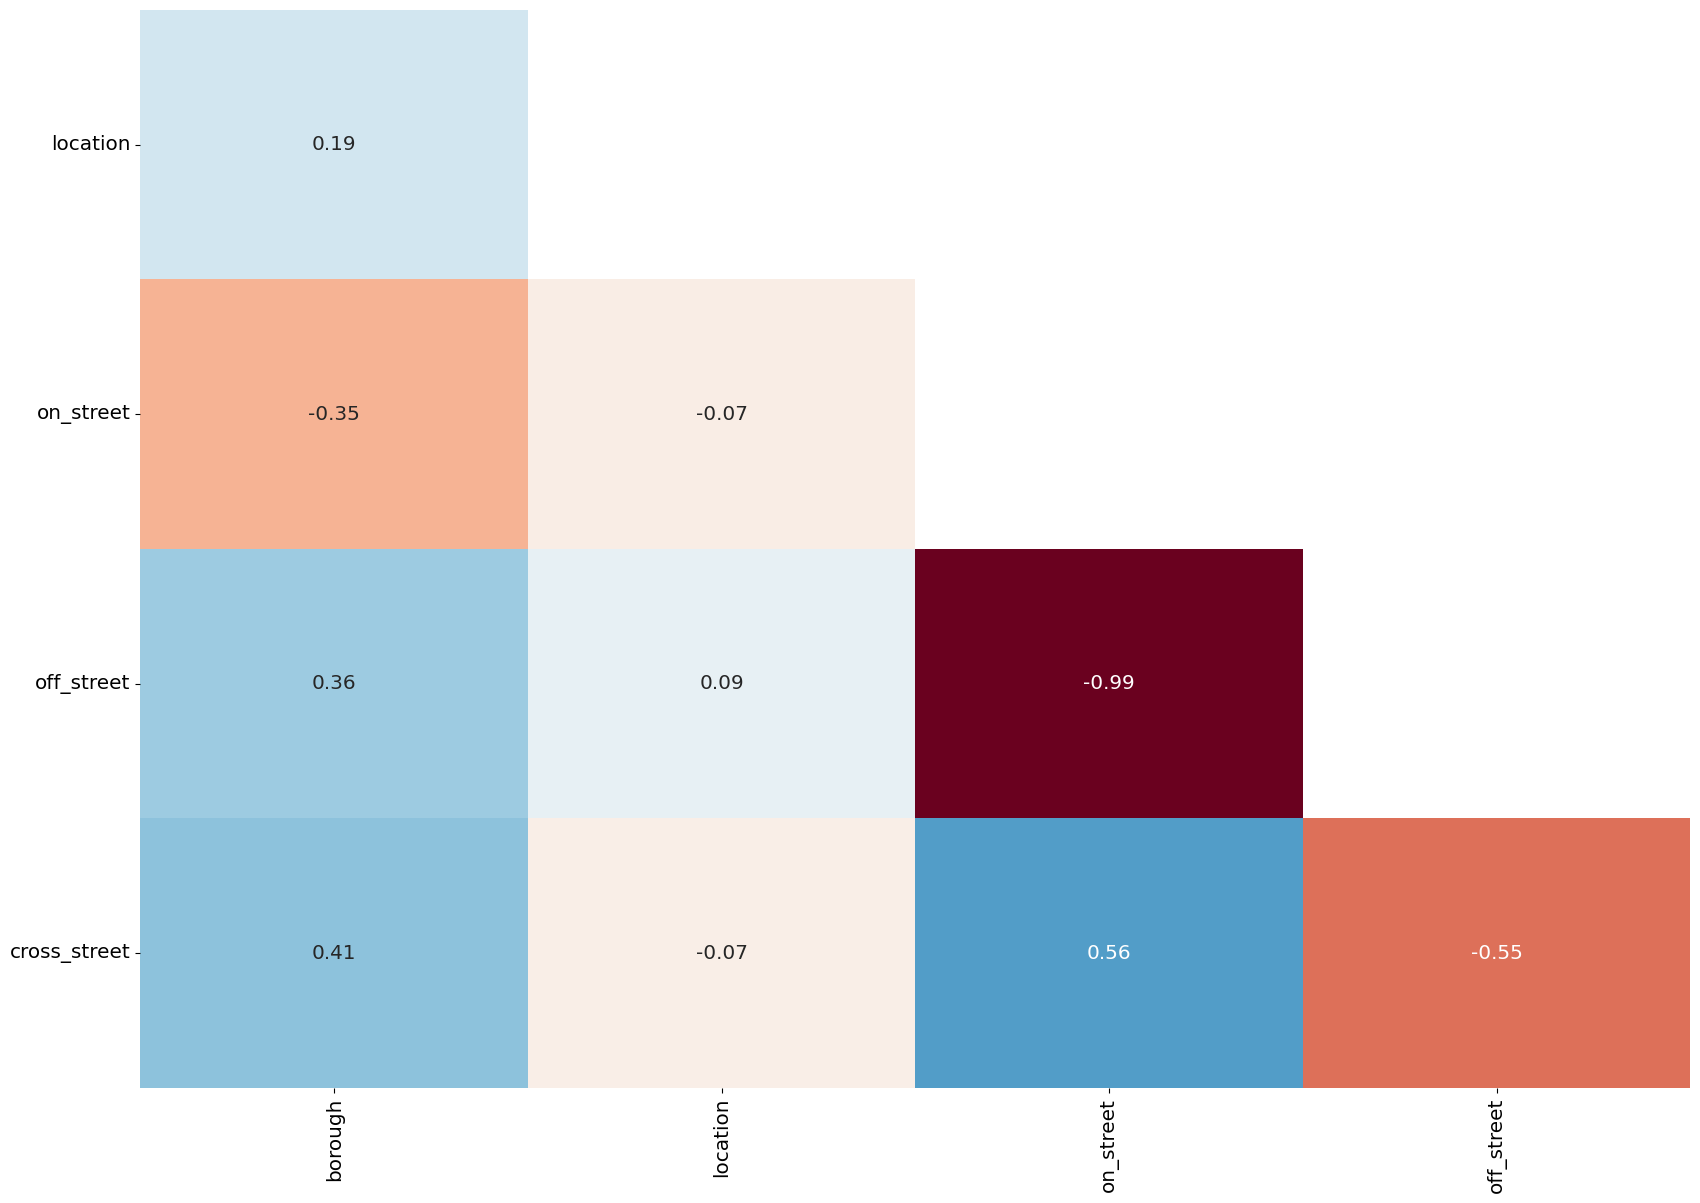

In [65]:
plot_null_correlations(location_data)

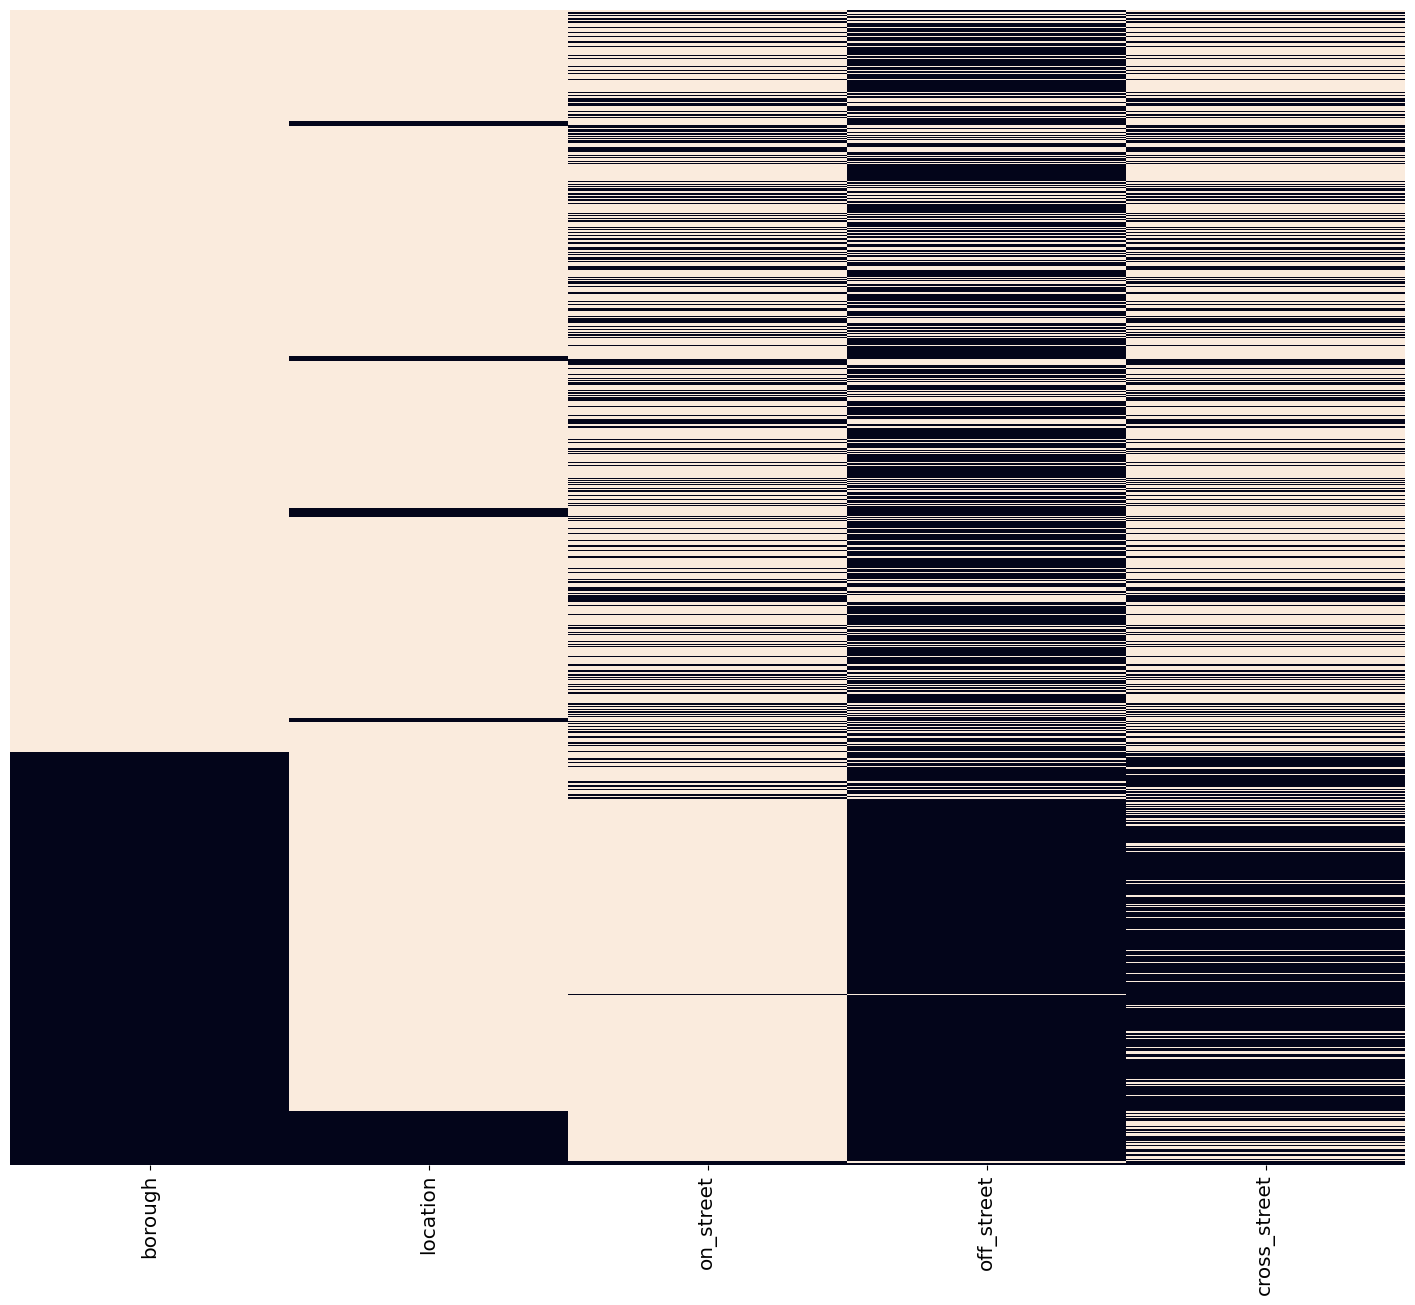

In [68]:
sorted_location_data = location_data.sort_values(loc_cols)
plot_null_matrix(sorted_location_data)

In [70]:
sup_data = pd.read_csv('/content/drive/MyDrive/Dataset/supplemental_data.csv')
sup_data.head()

,unique_key,location,on_street,off_street,borough
0,3869058,NaN,NaN,NaN,NaN
1,3847947,NaN,NaN,NaN,NaN
2,3914294,NaN,BELT PARKWAY,NaN,BROOKLYN
3,3915069,NaN,NaN,NaN,NaN
4,3923123,NaN,NaN,NaN,NaN


In [71]:
sup_data.isnull().sum()

unique_key        0
location      54056
on_street     48804
off_street    49505
borough       36274
dtype: int64

In [72]:
sup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57864 entries, 0 to 57863
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   unique_key  57864 non-null  int64 
 1   location    3808 non-null   object
 2   on_street   9060 non-null   object
 3   off_street  8359 non-null   object
 4   borough     21590 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


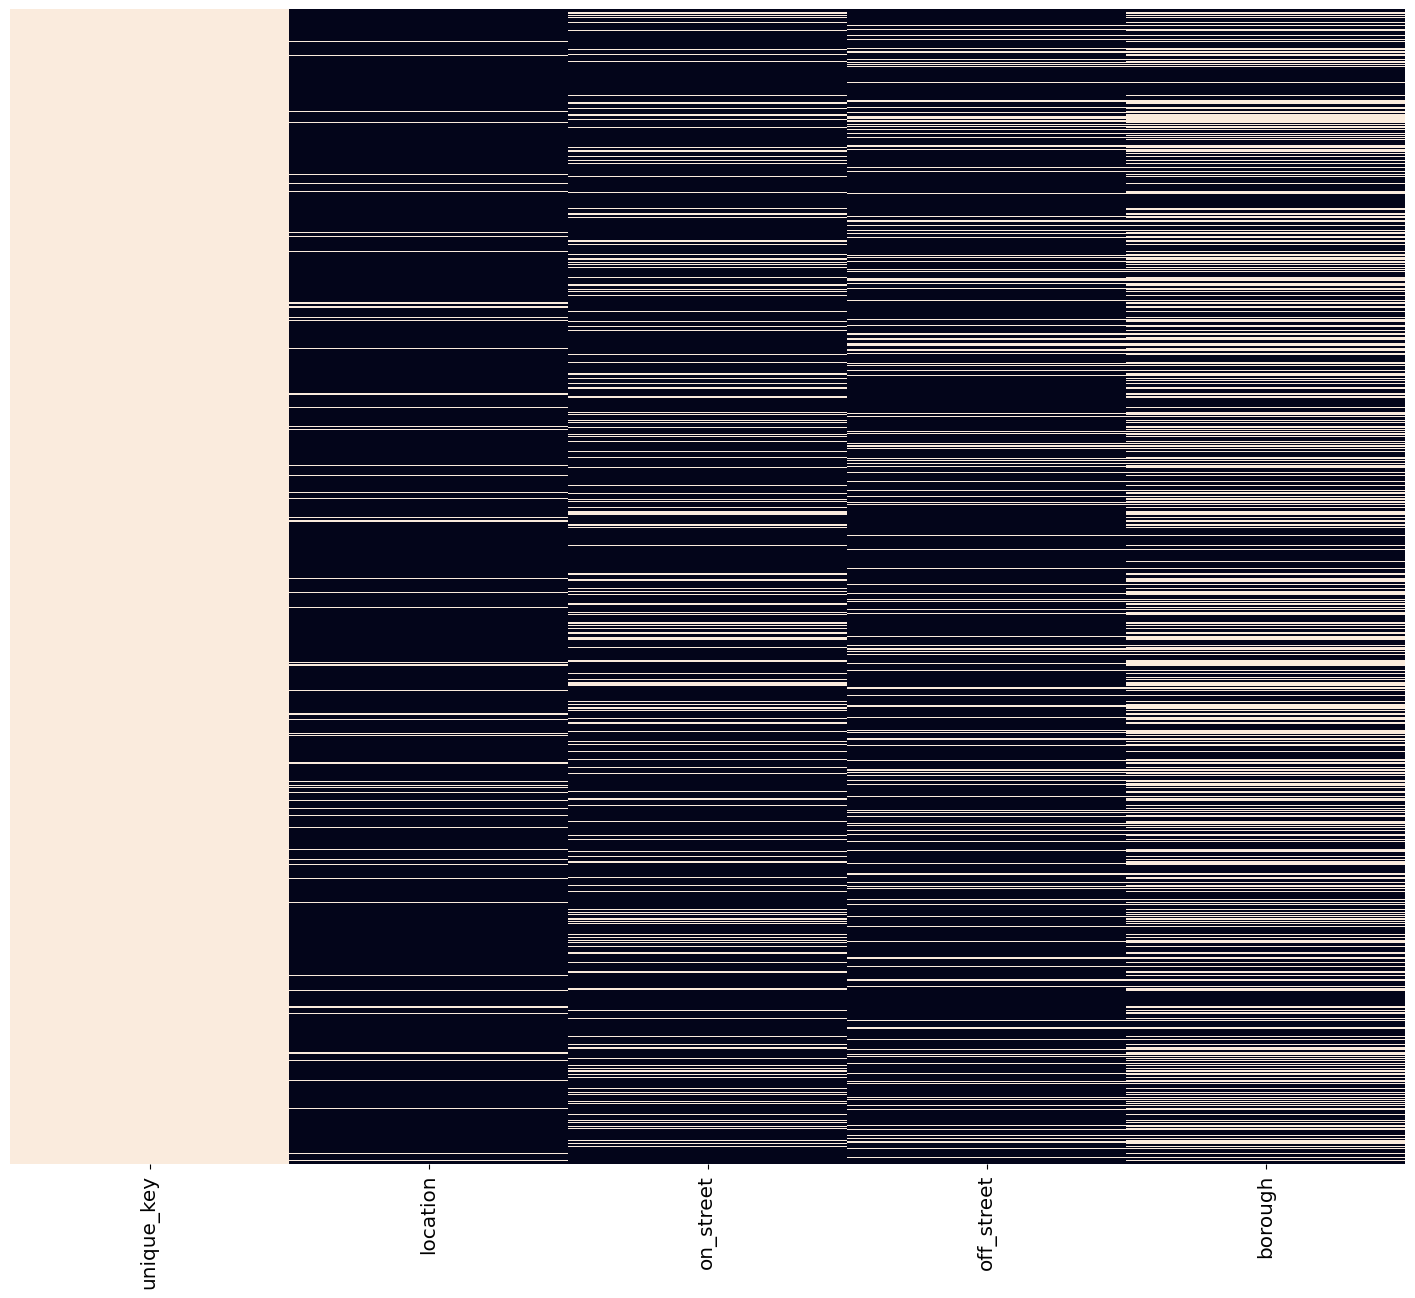

In [73]:
plot_null_matrix(sup_data)

The unique key values between the two data sets correspond so we can us the supplement dataset to fill in missing location related data from our primary / original dataset, MVC.

In [74]:
mvc_keys = mvc['unique_key']
sup_keys = sup_data['unique_key']

is_equal = mvc_keys.equals(sup_keys)
print(is_equal)

True


our for loop runs through the values that match correspondin columns in our mvc and supplemental dataset. If there is a null value in the primary, it fills it in with data available for the corresponding row and column. 

In [77]:
location_cols = ['location', 'on_street', 'off_street', 'borough']
null_before = mvc[location_cols].isnull().sum()

for l in location_cols:
    mvc[l] = mvc[l].mask(mvc[l].isnull(), sup_data[l])

null_after = mvc[location_cols].isnull().sum()
